In [1161]:
import numpy as np
import pandas as pd
import string
from nltk.corpus import stopwords

In [1162]:
df = pd.read_csv('spa.csv',encoding='latin-1')

In [1163]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
27,ham,Did you catch the bus ? Are you frying an egg ...,NaN,NaN,NaN
2477,ham,I'm done. I'm sorry. I hope your next space gi...,NaN,NaN,NaN
2534,ham,Ok enjoy . R u there in home.,NaN,NaN,NaN
1261,ham,Thank you so much. When we skyped wit kz and s...,NaN,NaN,NaN
1067,ham,Meeting u is my work. . . Tel me when shall i ...,NaN,NaN,NaN


In [1164]:
df.shape

(5589, 5)

In [1165]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [1166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5589 entries, 0 to 5588
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5589 non-null   object
 1   v2          5589 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 218.4+ KB


In [1167]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [1168]:
df.sample(5)

,v1,v2
619,ham,Let there be snow. Let there be snow. This kin...
654,ham,Did u got that persons story
5479,ham,Really do hope the work doesnt get stressful. ...
723,ham,Ya even those cookies have jelly on them
2148,ham,I will once i get home


In [1169]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3582,ham,I sent your maga that money yesterday oh.
4968,ham,I will cme i want to go to hos 2morow. After t...
4539,ham,"Urgh, coach hot, smells of chip fat! Thanks ag..."
1854,ham,They did't play one day last year know even th...
4814,ham,ÌÏ no home work to do meh...


In [1170]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [1171]:
df['target'] = encoder.fit_transform(df['target'])

In [1172]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free offer entry in 2 a wkly comp to win FA Cu...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [1173]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [1174]:
# check for duplicate values
df.duplicated().sum()

395

In [1175]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [1176]:
df.duplicated().sum()

0

In [1177]:
df.shape

(5194, 2)

## 2.EDA

In [1178]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free offer entry in 2 a wkly comp to win FA Cu...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [1179]:
df['target'].value_counts()

0    4516
1     678
Name: target, dtype: int64

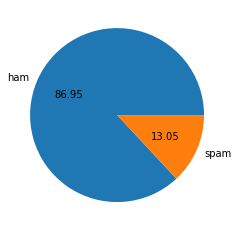

In [1180]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [1181]:
# Data is imbalanced

In [1182]:
import nltk
import string
from nltk.corpus import stopwords

In [1183]:
#!pip install nltk

In [1184]:
#nltk.download('punkt')

In [1185]:
df['num_characters'] = df['text'].apply(len)

In [1186]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free offer entry in 2 a wkly comp to win FA Cu...,161
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [1187]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [1188]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free offer entry in 2 a wkly comp to win FA Cu...,161,38
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [1189]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [1190]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free offer entry in 2 a wkly comp to win FA Cu...,161,38,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [1191]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5194.000000,5194.000000,5194.000000
mean,79.070081,18.458991,1.947247
std,58.205428,13.311563,1.361031
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [1192]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [1193]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,678.000000,678.000000,678.000000
mean,136.424779,27.371681,2.930678
std,31.862279,7.307382,1.481417
min,13.000000,2.000000,1.000000
25%,129.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [1194]:
import seaborn as sns

In [1195]:
#pip install -U seaborn

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

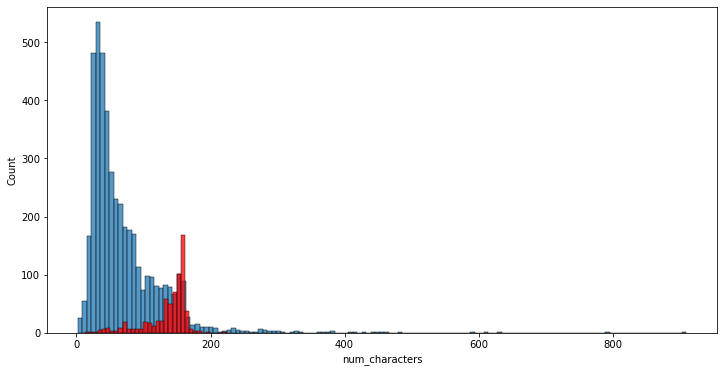

In [1196]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

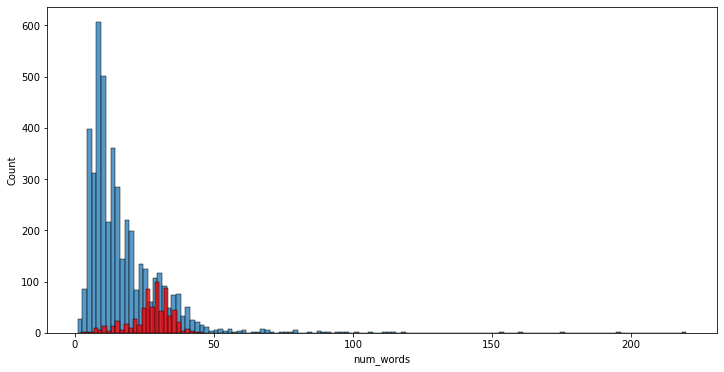

In [1197]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

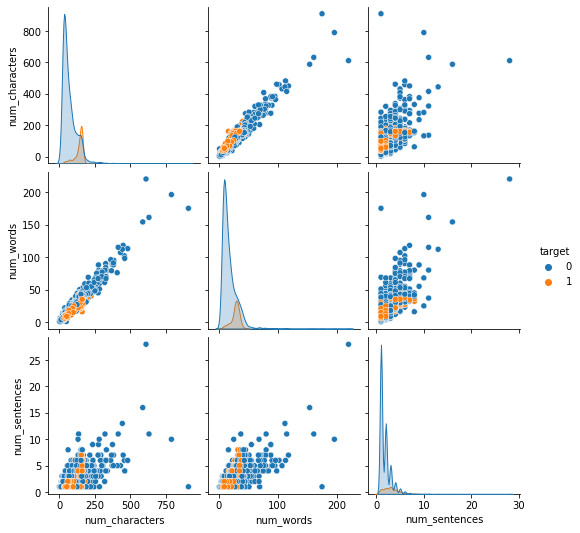

In [1198]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

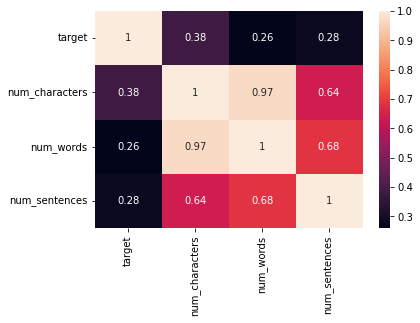

In [1199]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [1200]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [1201]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [1202]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [1203]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [1204]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [1205]:
df['transformed_text'] = df['text'].apply(transform_text)

In [1206]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free offer entry in 2 a wkly comp to win FA Cu...,161,38,2,free offer entri 2 wkli comp win fa cup final ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [1207]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [1208]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

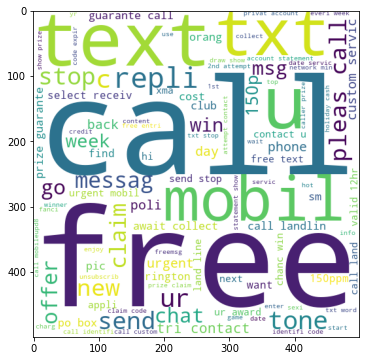

In [1209]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [1210]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

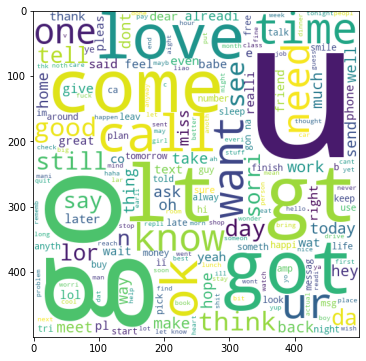

In [1211]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [1212]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free offer entry in 2 a wkly comp to win FA Cu...,161,38,2,free offer entri 2 wkli comp win fa cup final ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [1213]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [1214]:
len(spam_corpus)

10221

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


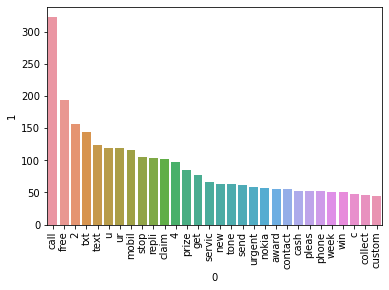

In [1215]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [1216]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [1217]:
len(ham_corpus)

35394

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


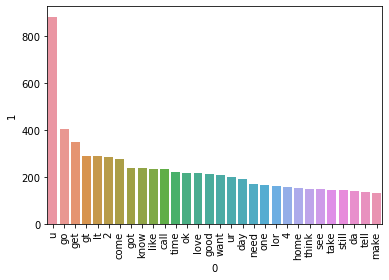

In [1218]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [1219]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free offer entry in 2 a wkly comp to win FA Cu...,161,38,2,free offer entri 2 wkli comp win fa cup final ...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [1220]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [1221]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [1222]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [1223]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [1224]:
X.shape

(5194, 3000)

In [1225]:
y = df['target'].values

In [1226]:
from sklearn.model_selection import train_test_split

In [1227]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [1228]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [1229]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [1230]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8546679499518768
[[772 121]
 [ 30 116]]
0.48945147679324896


In [1231]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9663137632338787
[[893   0]
 [ 35 111]]
1.0


In [1232]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971126082771896
[[890   3]
 [ 27 119]]
0.9754098360655737


In [1045]:
# tfidf --> MNB

In [1046]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [1047]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [1048]:
clfs ={
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [1049]:
#clfs=list(cl)

In [1050]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [1051]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9701348747591522, 0.9537037037037037)

In [1052]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9701348747591522
Precision -  0.9537037037037037
For  KN
Accuracy -  0.9075144508670521
Precision -  1.0
For  NB
Accuracy -  0.9720616570327553
Precision -  1.0
For  DT
Accuracy -  0.9393063583815029
Precision -  0.851063829787234
For  LR
Accuracy -  0.9527938342967245
Precision -  0.925531914893617
For  RF
Accuracy -  0.9691714836223507
Precision -  0.98989898989899
For  AdaBoost
Accuracy -  0.9585741811175337
Precision -  0.9056603773584906
For  BgC
Accuracy -  0.9624277456647399
Precision -  0.8947368421052632
For  ETC
Accuracy -  0.9701348747591522
Precision -  0.9537037037037037
For  GBDT
Accuracy -  0.9508670520231214
Precision -  0.9534883720930233


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:55:52] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For  xgb
Accuracy -  0.964354527938343
Precision -  0.9339622641509434


In [1053]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [1054]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907514,1.000000
2,NB,0.972062,1.000000
5,RF,0.969171,0.989899
0,SVC,0.970135,0.953704
8,ETC,0.970135,0.953704
9,GBDT,0.950867,0.953488
10,xgb,0.964355,0.933962
4,LR,0.952794,0.925532
6,AdaBoost,0.958574,0.905660
7,BgC,0.962428,0.894737


In [1055]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [1056]:
#keys=list(performance_df1.keys())
#vals=[performance_df1[k][:-1] for k in keys]

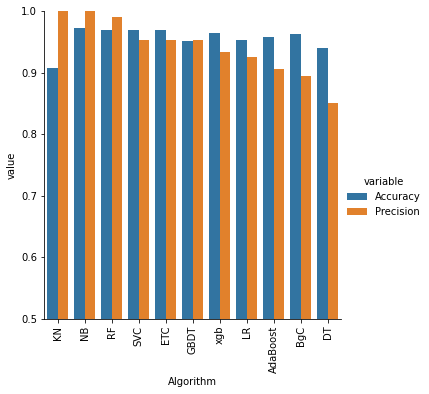

In [1057]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [1058]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [1059]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [1060]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [1061]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [1062]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [1063]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [1064]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907514,1.000000,0.907514,1.000000,0.907514,1.000000,0.907514,1.000000
1,NB,0.972062,1.000000,0.972062,1.000000,0.972062,1.000000,0.972062,1.000000
2,RF,0.969171,0.989899,0.969171,0.989899,0.969171,0.989899,0.969171,0.989899
3,SVC,0.970135,0.953704,0.970135,0.953704,0.970135,0.953704,0.970135,0.953704
4,ETC,0.970135,0.953704,0.970135,0.953704,0.970135,0.953704,0.970135,0.953704
5,GBDT,0.950867,0.953488,0.950867,0.953488,0.950867,0.953488,0.950867,0.953488
6,xgb,0.964355,0.933962,0.964355,0.933962,0.964355,0.933962,0.964355,0.933962
7,LR,0.952794,0.925532,0.952794,0.925532,0.952794,0.925532,0.952794,0.925532
8,AdaBoost,0.958574,0.905660,0.958574,0.905660,0.958574,0.905660,0.958574,0.905660
9,BgC,0.962428,0.894737,0.962428,0.894737,0.962428,0.894737,0.962428,0.894737


In [1065]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [1066]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [1067]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [1068]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.976878612716763
Precision 1.0


In [1069]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [1070]:
from sklearn.ensemble import StackingClassifier

In [1071]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [1072]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9759152215799615
Precision 0.9642857142857143


In [1160]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))